### Import Required Libraries and Set Up Environment Variables

In [79]:
#!pip install fredapi
#!pip install ipywidgets


In [101]:
# Dependencies
import numpy as np
import requests
import time
import os
import pandas as pd
import json
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy import stats
from dotenv import load_dotenv
from fredapi import Fred


# from fredapi is a library that provides functionality to interact with the
# FRED (Federal Reserve Economic Data).
# import Fred imports the Fred class (or function) from the fredapi module.
# The fred variable can call methods defined in the Fred class to access
# economic data from the FRED API.


from fredapi import Fred

#### The US dollar (USD) to Mexican peson (MXN) foreign exchange rate.
#### Imagine you are an American going on a vacation to Mexico in three months.   
#### You can exchange your hard earned USD to MXN now or wait until you arrive
#### in Mexico. This project will help you to make an informed decision.  Better
#### yet, you can then learn to apply this methodology when you travel to other
#### foreign countries.

### Access Fred data using api_key

In [81]:
# Initializes a new object of the Fred class and assigns it to the variable
# fred.
# This api_key is used for authentication when making requests to the
# FRED (Federal Reserve Economic Data) API.
# Later need to store the api_key in .env
# FRED is a free and reliable government data source.

# Load environment variables from the .env file
load_dotenv()

# Get the API key from environment variables
api_key = os.getenv("API_KEY")
fred = Fred(api_key=api_key)


In [82]:
# Fetch data using fred.get_series().

# Use variable to store startd_date
start_date = "2010-01-01"

# Exchange rate: $1 equals Mexican pesos
exchange_rate = fred.get_series("DEXMXUS", start=start_date)

# U.S. fed rate
fed_rate = fred.get_series("FEDFUNDS", start=start_date)

# U.S. 90-days T-bill rate
t_bill_rate = fred.get_series('TB3MS', start=start_date)

# Mexico 90-days T-bill rate
mx_t_bill_rate = fred.get_series('INTGSTMXM193N', start=start_date)

# U.S. Real GDP, adjusted for inflation
us_gdp = fred.get_series('GDPC1', start=start_date)

# Mexico Real GDP, adjusted for inflation
mx_gdp = fred.get_series('NGDPRSAXDCMXQ', start=start_date)

# Oil prices - West Texas Intermediate (WTI) crude oil price in dollars per barrel
oil_price = fred.get_series('DCOILWTICO', start=start_date)



### Create master DataFrame containing all data.

In [83]:
# Select series from https://fred.stlouisfed.org/series

# Combine the time series into a DataFrame and sort by date
data = pd.DataFrame({
    'Exchange Rate': exchange_rate,
    'Fed Rate': fed_rate,
    'US 90-Day T-bill': t_bill_rate,
    'MX 90-Day T-bill': mx_t_bill_rate,
    'US Real GDP': us_gdp,
    'MX Real GDP': mx_gdp,
    'Oil Price': oil_price
}).sort_index()



In [84]:
# Get the start and end dates for each time series in data

# Exchange rate (USD to MXN)
exchange_rate_series = fred.get_series("DEXMXUS")
print(f"The Exchange Rate start and end dates: {exchange_rate_series.index.min().strftime('%Y-%m-%d')} to {exchange_rate_series.index.max().strftime('%Y-%m-%d')}")

# US Fed Rate
fed_rate_series = fred.get_series("FEDFUNDS")
print(f"The US Fed Rate start and end dates: {fed_rate_series.index.min().strftime('%Y-%m-%d')} to {fed_rate_series.index.max().strftime('%Y-%m-%d')}")

# US 90-Day T-bill
t_bill_rate_series = fred.get_series("TB3MS")
print(f"The US 90-Day T-bill start and end dates: {t_bill_rate_series.index.min().strftime('%Y-%m-%d')} to {t_bill_rate_series.index.max().strftime('%Y-%m-%d')}")

# Mexico 90-Day T-bill
mx_t_bill_rate_series = fred.get_series("INTGSTMXM193N")
print(f"The Mexico 90-Day T-bill start and end dates: {mx_t_bill_rate_series.index.min().strftime('%Y-%m-%d')} to {mx_t_bill_rate_series.index.max().strftime('%Y-%m-%d')}")

# US Real GDP
us_gdp_series = fred.get_series("GDPC1")
print(f"The US Real GDP start and end dates: {us_gdp_series.index.min().strftime('%Y-%m-%d')} to {us_gdp_series.index.max().strftime('%Y-%m-%d')}")

# Mexico Real GDP
mx_gdp_series = fred.get_series("NGDPRSAXDCMXQ")
print(f"The Mexico Real GDP start and end dates: {mx_gdp_series.index.min().strftime('%Y-%m-%d')} to {mx_gdp_series.index.max().strftime('%Y-%m-%d')}")

# Oil Prices - West Texas Intermediate (WTI) crude oil price
oil_price_series = fred.get_series("DCOILWTICO")
print(f"The Oil Price start and end dates: {oil_price_series.index.min().strftime('%Y-%m-%d')} to {oil_price_series.index.max().strftime('%Y-%m-%d')}")




The Exchange Rate start and end dates: 1993-11-08 to 2024-11-01
The US Fed Rate start and end dates: 1954-07-01 to 2024-10-01
The US 90-Day T-bill start and end dates: 1934-01-01 to 2024-10-01
The Mexico 90-Day T-bill start and end dates: 1978-01-01 to 2024-08-01
The US Real GDP start and end dates: 1947-01-01 to 2024-07-01
The Mexico Real GDP start and end dates: 1993-01-01 to 2024-04-01
The Oil Price start and end dates: 1986-01-02 to 2024-11-04


In [85]:
data.head()
data.tail()

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,Oil Price
2024-10-29,20.0000,NaN,NaN,NaN,NaN,NaN,67.48
2024-10-30,20.1720,NaN,NaN,NaN,NaN,NaN,68.91
2024-10-31,20.0314,NaN,NaN,NaN,NaN,NaN,69.58
2024-11-01,20.0273,NaN,NaN,NaN,NaN,NaN,69.81
2024-11-04,NaN,NaN,NaN,NaN,NaN,NaN,71.83


In [86]:
# Using shape to get the dimension of the DataFrame.
data.shape
print(data.columns)
data.dtypes

# Convert index to datetime format
data.index = pd.to_datetime(data.index)



Index(['Exchange Rate', 'Fed Rate', 'US 90-Day T-bill', 'MX 90-Day T-bill',
       'US Real GDP', 'MX Real GDP', 'Oil Price'],
      dtype='object')


In [87]:
import pandas as pd

# ---------------------------------
# Create Daily Data for Exchange Rate and Oil Prices
# ---------------------------------

# Creating a DataFrame for daily data, including:
# - 'Exchange Rate' between USD and MXN (Exchange rate data)
# - 'Oil Price' in USD per barrel (Oil price data)
# Both of these metrics are typically collected on a daily basis.
# Sorting the data by date to ensure it is in chronological order.
# Dropping any rows with NaN values to ensure clean data.
daily_exchange_rate_oil_df = pd.DataFrame({
    'Exchange Rate': exchange_rate,
    'Oil Price': oil_price
}).sort_index()  # Sort by index (date) to ensure chronological order

# Drop any rows with missing values to maintain data integrity for analysis
daily_exchange_rate_oil_df.dropna(inplace=True)

# ---------------------------------
# Create DataFrame for Fed Rate (Policy Rate)
# ---------------------------------

# Creating a DataFrame for the Fed Rate only, which is a policy interest rate set by the Federal Reserve.
# This rate is often used to influence economic activity and inflation but does not directly represent a market rate.
fed_rate_df = pd.DataFrame({
    'Fed Rate': fed_rate
}).sort_index()  # Sort by index (date) for chronological order

# Drop any rows with missing values for the Fed Rate
fed_rate_df.dropna(inplace=True)

# ---------------------------------
# Create DataFrame for 90-Day T-bill Rates (Market Rates)
# ---------------------------------

# Creating a DataFrame for T-bill rates, which are market-driven interest rates reflecting the borrowing costs
# for short-term government debt in the U.S. and Mexico.
# This includes both the U.S. and Mexico 90-Day T-bill rates.
t_bill_rates_df = pd.DataFrame({
    'US 90-Day T-bill': t_bill_rate,
    'MX 90-Day T-bill': mx_t_bill_rate
}).sort_index()  # Sort by index (date) for chronological order

# Drop any rows with missing values for the T-bill rates
t_bill_rates_df.dropna(inplace=True)

# ---------------------------------
# Create Quarterly Data for GDP (US and Mexico)
# ---------------------------------

# Creating a DataFrame for quarterly GDP data, including:
# - 'US Real GDP' (Gross Domestic Product for the United States, inflation-adjusted)
# - 'MX Real GDP' (Gross Domestic Product for Mexico, inflation-adjusted)
# These GDP values are reported quarterly, capturing broader economic trends.
# Sorting by date for chronological order.
# Dropping any rows with NaN values to ensure clean data for analysis.
quarterly_gdp_df = pd.DataFrame({
    'US Real GDP': us_gdp,
    'MX Real GDP': mx_gdp
}).sort_index()  # Sort by index (date) to ensure chronological order

# Drop rows with NaN values to eliminate missing data points in GDP analysis
quarterly_gdp_df.dropna(inplace=True)

# ---------------------------------
# Displaying DataFrame Head and Shape to Confirm Structure and Size
# ---------------------------------

# Display the first few rows and shape of each DataFrame to confirm:
# - The data has been correctly organized into daily, monthly, and quarterly DataFrames.
# - Any missing data has been removed from each DataFrame.
# - Each DataFrame is in chronological order by date.
# - The shape of each DataFrame shows the number of rows (observations) and columns (variables) after dropping NaN values.

print("Daily Exchange Rate and Oil Price Data:")
print(daily_exchange_rate_oil_df.head())  # Display first 5 rows of daily data
print("Shape:", daily_exchange_rate_oil_df.shape)  # Display shape of daily data

print("\nFed Rate Data (Monthly Policy Rate):")
print(fed_rate_df.head())  # Display first 5 rows of Fed Rate data
print("Shape:", fed_rate_df.shape)  # Display shape of Fed Rate data

print("\n90-Day T-bill Rates Data (Monthly Market Rates):")
print(t_bill_rates_df.head())  # Display first 5 rows of T-bill rates data
print("Shape:", t_bill_rates_df.shape)  # Display shape of T-bill rates data

print("\nQuarterly GDP Data (US and Mexico):")
print(quarterly_gdp_df.head())  # Display first 5 rows of quarterly GDP data
print("Shape:", quarterly_gdp_df.shape)  # Display shape of quarterly GDP data




Daily Exchange Rate and Oil Price Data:
            Exchange Rate  Oil Price
1993-11-08          3.152      16.69
1993-11-09          3.240      16.71
1993-11-10          3.240      16.54
1993-11-12          3.240      16.72
1993-11-15          3.215      16.78
Shape: (7708, 2)

Fed Rate Data (Monthly Policy Rate):
            Fed Rate
1954-07-01      0.80
1954-08-01      1.22
1954-09-01      1.07
1954-10-01      0.85
1954-11-01      0.83
Shape: (844, 1)

90-Day T-bill Rates Data (Monthly Market Rates):
            US 90-Day T-bill  MX 90-Day T-bill
1986-10-01              5.18        107.871483
1986-11-01              5.35        105.046301
1986-12-01              5.53        106.499252
1987-01-01              5.43        105.732417
1987-02-01              5.59        105.903946
Shape: (455, 2)

Quarterly GDP Data (US and Mexico):
            US Real GDP  MX Real GDP
1993-01-01    10576.275    3450157.5
1993-04-01    10637.847    3451079.0
1993-07-01    10688.606    3491206.0
1993-10-

In [88]:
# Preview data
# why above US GDP has value for 1946-01-01 but below no value for 1946-01-01
# Exchange Rate nad US on daily basis when market is opened.  Other data
# is based on different time interval (monthly, quarterly)
# Note: 1946-01-01 is default if start_date out of range.
data.tail()

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,Oil Price
2024-10-29,20.0000,NaN,NaN,NaN,NaN,NaN,67.48
2024-10-30,20.1720,NaN,NaN,NaN,NaN,NaN,68.91
2024-10-31,20.0314,NaN,NaN,NaN,NaN,NaN,69.58
2024-11-01,20.0273,NaN,NaN,NaN,NaN,NaN,69.81
2024-11-04,NaN,NaN,NaN,NaN,NaN,NaN,71.83


In [89]:
# Use dtpes to check data types
print(data.dtypes)
print(data.index)

Exchange Rate       float64
Fed Rate            float64
US 90-Day T-bill    float64
MX 90-Day T-bill    float64
US Real GDP         float64
MX Real GDP         float64
Oil Price           float64
dtype: object
DatetimeIndex(['1934-01-01', '1934-02-01', '1934-03-01', '1934-04-01',
               '1934-05-01', '1934-06-01', '1934-07-01', '1934-08-01',
               '1934-09-01', '1934-10-01',
               ...
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04'],
              dtype='datetime64[ns]', length=10890, freq=None)


# -------------------------------
# Visualization: Line Plots
# -------------------------------

This section provides a series of line plots to visualize key economic indicators for the U.S. and Mexico, organized by data frequency (daily, monthly, and quarterly) and relevance. These plots utilize Seaborn and Matplotlib to create clear, comparative visualizations for each dataset. Here’s a breakdown of each plot:

1. **Daily Data - USD to MXN Exchange Rate and WTI Oil Price**:
   - This plot visualizes the daily fluctuations in the USD to MXN exchange rate alongside WTI oil prices. Both metrics are subject to market influences and provide insight into currency valuation relative to oil market trends. Each line is color-coded for clarity, with a solid line for the exchange rate and a dashed line for oil prices.

2. **Monthly Data - US Fed Rate (Policy Rate)**:
   - This standalone plot shows the U.S. Federal Funds Rate, a policy-driven interest rate set by the Federal Reserve. It reflects the Federal Reserve's efforts to influence inflation and economic growth. There is no equivalent Mexican policy rate in this dataset, so only the U.S. Fed Rate is displayed.

3. **Monthly Data - 90-Day T-bill Rates for US and Mexico**:
   - This plot compares the 90-Day Treasury bill rates for both the U.S. and Mexico using a dual y-axis configuration. The U.S. T-bill rate is shown on the left y-axis, while the Mexican T-bill rate is on the right y-axis, allowing for easier comparison despite different value ranges. This setup enables us to observe the short-term government borrowing costs in each country, which are indicative of their respective economic conditions.

4. **Quarterly Data - Real GDP for US and Mexico**:
   - This plot displays the quarterly Real GDP for both the U.S. and Mexico on the same y-axis. Real GDP represents the inflation-adjusted economic output, making it a useful metric for comparing economic growth trends. Both countries' GDP data are plotted on a single axis since they are measured in comparable units.

Each plot includes labeled axes, titles, and legends to facilitate easy interpretation. The use of color and line styles helps differentiate between datasets, ensuring that the visual representation is both informative and visually accessible.


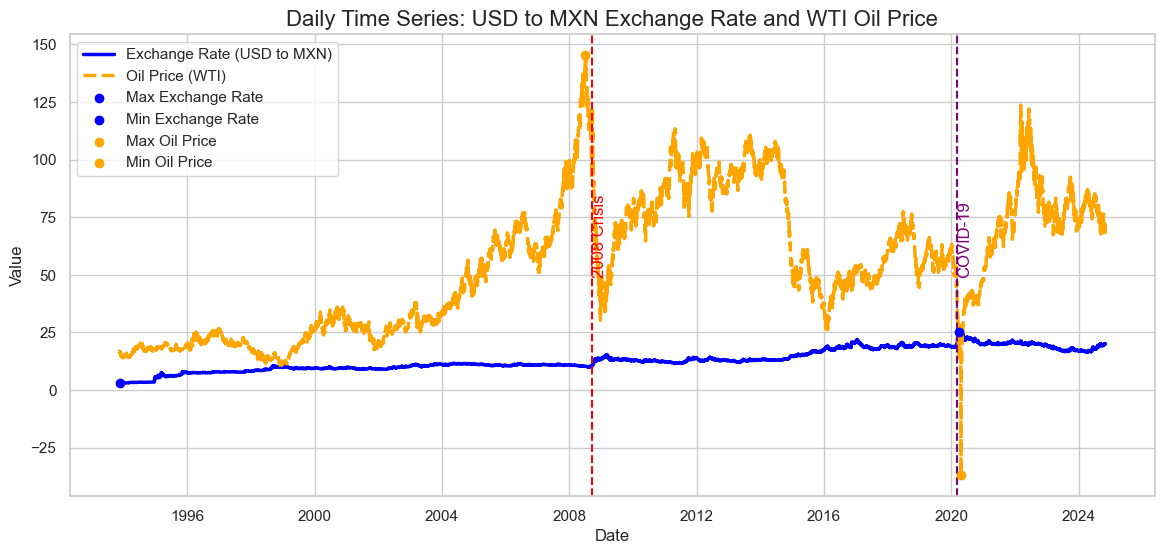

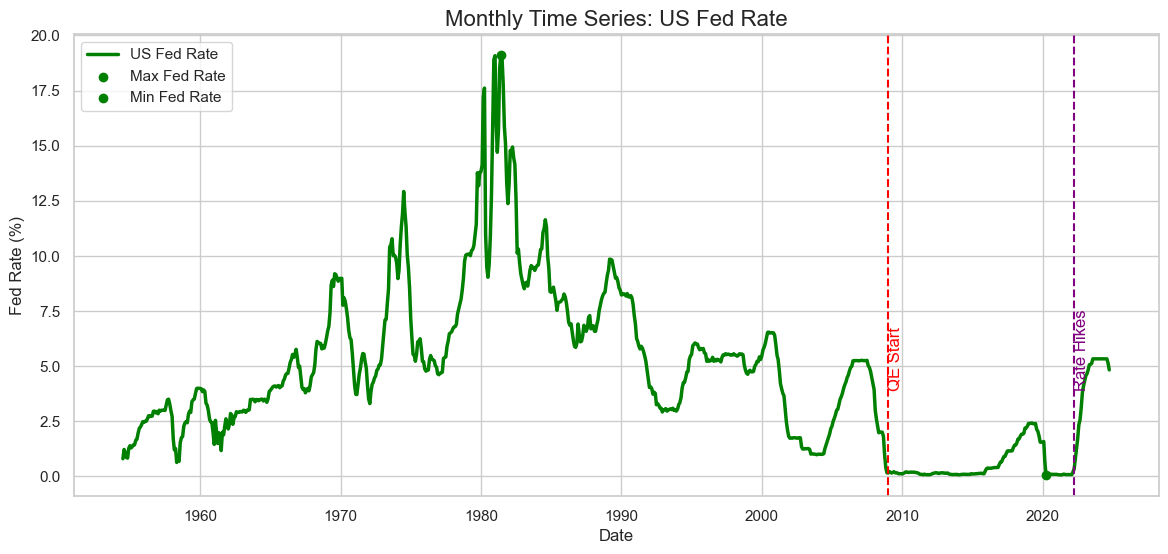

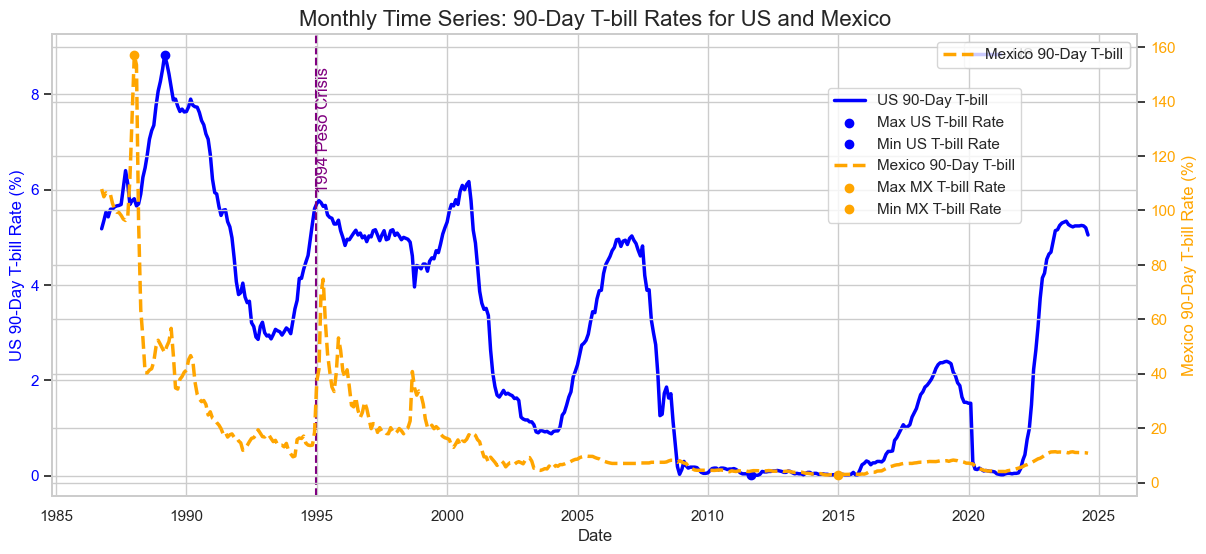

In [90]:
# Set Seaborn style for all plots
sns.set(style="whitegrid")

# Convert date strings to datetime objects
financial_crisis_date = datetime.strptime("2008-09-15", "%Y-%m-%d")
covid_date = datetime.strptime("2020-03-11", "%Y-%m-%d")
qe_start_date = datetime.strptime("2008-12-16", "%Y-%m-%d")
rate_hikes_date = datetime.strptime("2022-03-16", "%Y-%m-%d")
peso_crisis_date = datetime.strptime("1994-12-20", "%Y-%m-%d")

# -------------------------------
# Plotting Daily Data: Exchange Rate (USD to MXN) and WTI Oil Price
# -------------------------------

plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_exchange_rate_oil_df.index, y=daily_exchange_rate_oil_df['Exchange Rate'], color="blue", linewidth=2.5, label="Exchange Rate (USD to MXN)")
sns.lineplot(x=daily_exchange_rate_oil_df.index, y=daily_exchange_rate_oil_df['Oil Price'], color="orange", linewidth=2.5, linestyle='--', label="Oil Price (WTI)")

# Adding key events
plt.axvline(x=financial_crisis_date, color="red", linestyle="--")  # 2008 Financial Crisis
plt.text(financial_crisis_date, 50, "2008 Crisis", color="red", rotation=90)
plt.axvline(x=covid_date, color="purple", linestyle="--")  # COVID-19 pandemic declaration
plt.text(covid_date, 50, "COVID-19", color="purple", rotation=90)

# Highlighting max and min for Exchange Rate
exchange_max = daily_exchange_rate_oil_df['Exchange Rate'].idxmax()
exchange_min = daily_exchange_rate_oil_df['Exchange Rate'].idxmin()
plt.scatter(exchange_max, daily_exchange_rate_oil_df['Exchange Rate'].max(), color="blue", label="Max Exchange Rate", zorder=5)
plt.scatter(exchange_min, daily_exchange_rate_oil_df['Exchange Rate'].min(), color="blue", label="Min Exchange Rate", zorder=5)

# Highlighting max and min for Oil Price
oil_max = daily_exchange_rate_oil_df['Oil Price'].idxmax()
oil_min = daily_exchange_rate_oil_df['Oil Price'].idxmin()
plt.scatter(oil_max, daily_exchange_rate_oil_df['Oil Price'].max(), color="orange", label="Max Oil Price", zorder=5)
plt.scatter(oil_min, daily_exchange_rate_oil_df['Oil Price'].min(), color="orange", label="Min Oil Price", zorder=5)

plt.title("Daily Time Series: USD to MXN Exchange Rate and WTI Oil Price", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.show()

# -------------------------------
# Plotting Monthly Data: Fed Rate (Policy Rate) for the US
# -------------------------------

plt.figure(figsize=(14, 6))
sns.lineplot(x=fed_rate_df.index, y=fed_rate_df['Fed Rate'], linewidth=2.5, color="green", label="US Fed Rate")

# Adding key events
plt.axvline(x=qe_start_date, color="red", linestyle="--")  # Start of quantitative easing
plt.text(qe_start_date, 4, "QE Start", color="red", rotation=90)
plt.axvline(x=rate_hikes_date, color="purple", linestyle="--")  # Start of rate hikes after COVID-19
plt.text(rate_hikes_date, 4, "Rate Hikes", color="purple", rotation=90)

# Highlighting max and min for Fed Rate
fed_max = fed_rate_df['Fed Rate'].idxmax()
fed_min = fed_rate_df['Fed Rate'].idxmin()
plt.scatter(fed_max, fed_rate_df['Fed Rate'].max(), color="green", label="Max Fed Rate", zorder=5)
plt.scatter(fed_min, fed_rate_df['Fed Rate'].min(), color="green", label="Min Fed Rate", zorder=5)

plt.title("Monthly Time Series: US Fed Rate", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Fed Rate (%)", fontsize=12)
plt.legend()
plt.show()

# -------------------------------
# Plotting Monthly Data: 90-Day T-bill Rates for US and Mexico
# -------------------------------

fig, ax1 = plt.subplots(figsize=(14, 6))
sns.lineplot(x=t_bill_rates_df.index, y=t_bill_rates_df['US 90-Day T-bill'], ax=ax1, color="blue", linewidth=2.5, label="US 90-Day T-bill")
ax1.set_ylabel("US 90-Day T-bill Rate (%)", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Highlighting max and min for US T-bill Rate
us_tbill_max = t_bill_rates_df['US 90-Day T-bill'].idxmax()
us_tbill_min = t_bill_rates_df['US 90-Day T-bill'].idxmin()
ax1.scatter(us_tbill_max, t_bill_rates_df['US 90-Day T-bill'].max(), color="blue", label="Max US T-bill Rate", zorder=5)
ax1.scatter(us_tbill_min, t_bill_rates_df['US 90-Day T-bill'].min(), color="blue", label="Min US T-bill Rate", zorder=5)

# Create a second y-axis for the Mexico 90-Day T-bill rate
ax2 = ax1.twinx()
sns.lineplot(x=t_bill_rates_df.index, y=t_bill_rates_df['MX 90-Day T-bill'], ax=ax2, color="orange", linewidth=2.5, linestyle='--', label="Mexico 90-Day T-bill")
ax2.set_ylabel("Mexico 90-Day T-bill Rate (%)", fontsize=12, color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Highlighting max and min for Mexico T-bill Rate
mx_tbill_max = t_bill_rates_df['MX 90-Day T-bill'].idxmax()
mx_tbill_min = t_bill_rates_df['MX 90-Day T-bill'].idxmin()
ax2.scatter(mx_tbill_max, t_bill_rates_df['MX 90-Day T-bill'].max(), color="orange", label="Max MX T-bill Rate", zorder=5)
ax2.scatter(mx_tbill_min, t_bill_rates_df['MX 90-Day T-bill'].min(), color="orange", label="Min MX T-bill Rate", zorder=5)

# Adding key events
ax1.axvline(x=peso_crisis_date, color="purple", linestyle="--")  # Mexican Peso Crisis
ax1.text(peso_crisis_date, 6, "1994 Peso Crisis", color="purple", rotation=90)

plt.title("Monthly Time Series: 90-Day T-bill Rates for US and Mexico", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9), bbox_transform=ax1.transAxes)
plt.show()








# -------------------------------
# Interactive Plotting Function
# -------------------------------

In [91]:
# Set Seaborn style for all plots
sns.set(style="whitegrid")

# Function to create interactive line plots for time series data
def plot_time_series(data, title, ylabel):
    """
    This function creates an interactive line plot for a specified DataFrame.
    A dropdown widget allows users to select different columns in the DataFrame to plot.

    Parameters:
    - data (DataFrame): The DataFrame containing time series data to plot.
    - title (str): The title for the plot.
    - ylabel (str): The label for the y-axis.
    """
    # Nested function to update the plot based on selected column
    def interactive_plot(column):
        plt.figure(figsize=(14, 6))
        sns.lineplot(x=data.index, y=data[column], linewidth=2.5)
        plt.title(title, fontsize=16)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.show()

    # Create an interactive dropdown widget for selecting the column to plot
    interact(interactive_plot, column=widgets.Dropdown(options=data.columns, description="Select Variable:"))

# -------------------------------
# Create Interactive Plots for Each Data Frequency and Type
# -------------------------------

# Interactive plot for daily data: USD to MXN Exchange Rate and WTI Oil Price
print("Daily Data - USD to MXN Exchange Rate and WTI Oil Price")
plot_time_series(
    data=daily_exchange_rate_oil_df,
    title="Daily Time Series: USD to MXN Exchange Rate and WTI Oil Price",
    ylabel="Value"
)

# Interactive plot for monthly data: Fed Rate (Policy Rate)
print("Monthly Data - US Fed Rate")
plot_time_series(
    data=fed_rate_df,
    title="Monthly Time Series: US Fed Rate",
    ylabel="Fed Rate (%)"
)

# Interactive plot for monthly data: 90-Day T-bill Rates (Market Rates for US and Mexico)
print("Monthly Data - 90-Day T-bill Rates for US and Mexico")
plot_time_series(
    data=t_bill_rates_df,
    title="Monthly Time Series: 90-Day T-bill Rates for US and Mexico",
    ylabel="Interest Rate (%)"
)

# Interactive plot for quarterly data: Real GDP (US and Mexico)
print("Quarterly Data - US and Mexico Real GDP")
plot_time_series(
    data=quarterly_gdp_df,
    title="Quarterly Time Series: US and Mexico Real GDP",
    ylabel="Real GDP (in respective units)"
)


Daily Data - USD to MXN Exchange Rate and WTI Oil Price


interactive(children=(Dropdown(description='Select Variable:', options=('Exchange Rate', 'Oil Price'), value='…

Monthly Data - US Fed Rate


interactive(children=(Dropdown(description='Select Variable:', options=('Fed Rate',), value='Fed Rate'), Outpu…

Monthly Data - 90-Day T-bill Rates for US and Mexico


interactive(children=(Dropdown(description='Select Variable:', options=('US 90-Day T-bill', 'MX 90-Day T-bill'…

Quarterly Data - US and Mexico Real GDP


interactive(children=(Dropdown(description='Select Variable:', options=('US Real GDP', 'MX Real GDP'), value='…

### Welcome.  Congratulations and latest USD to MXN foreign exchange.

### Create Foreign Exchange DataFrame from Original DataFrame

In [92]:
# Select the Date and Exchange Rate columns and store in data_fx
# Only interested in the USD to MX Peso exchange rate for now.
# Use dropna() to select dates with available Exchange Rate
# Obtain the longest time series for Exchange Rate
data_fx = data[['Exchange Rate']].dropna()
# set_index so Date prints on the x-axis when graphing.
data_fx = data_fx.set_index(data_fx.index).sort_index()
data_fx.head()

,Exchange Rate
1993-11-08,3.152
1993-11-09,3.240
1993-11-10,3.240
1993-11-12,3.240
1993-11-15,3.215


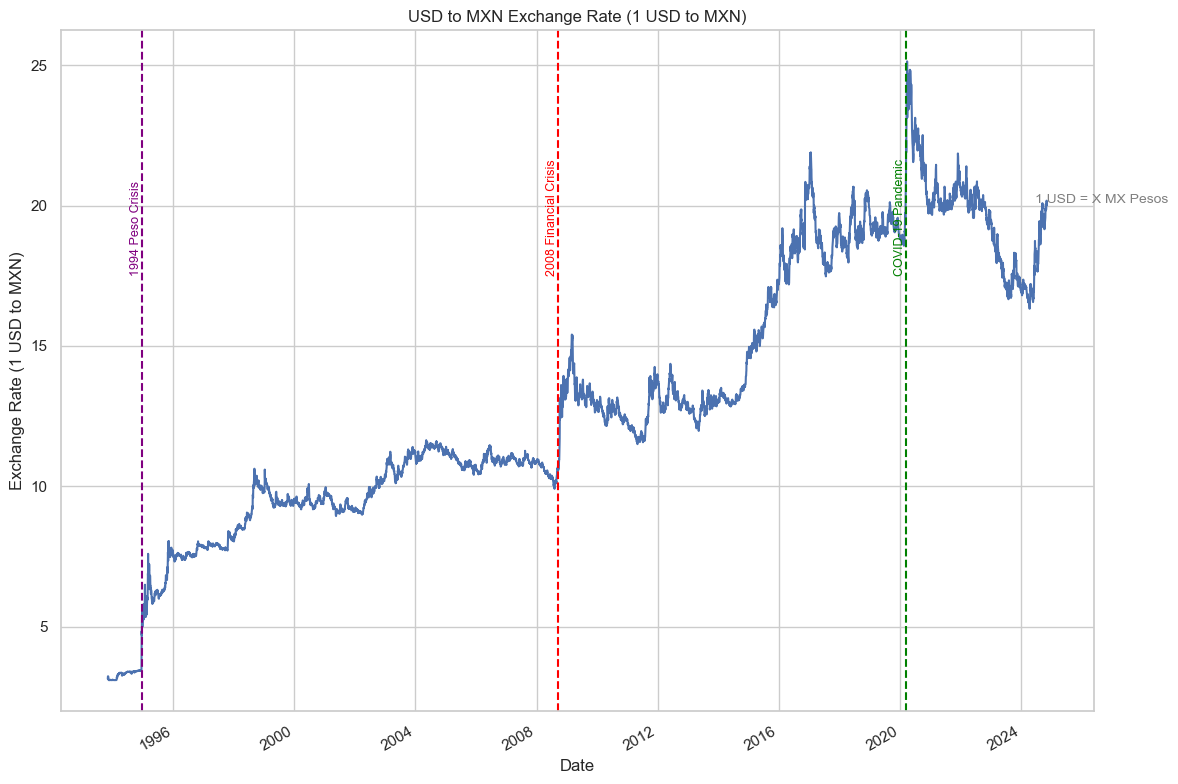

In [94]:
# Plot the Exchange Rate.  Provide title and label x and y-axis labels.
# When the USD to Peso exchange rate increases, the USD appreciates.
# When the USD to Peso exchange rate decreases, the USD depreciates.
# Note the time short time periods when USD appreciates dramaticlly.
# There is an upward trend in USD appreciation against the MXN in the
# past 30 years.

# -------------------------------
# Plotting the USD to MXN Exchange Rate with Major Economic Events
# -------------------------------

# Set up the plot area
plt.figure(figsize=(12, 8))

# Plot the data with title and axis labels
data_fx.plot(title='USD to MXN Exchange Rate (1 USD to MXN)', legend=False, ax=plt.gca())

# Label the x-axis as 'Date' for clarity in time series data
plt.xlabel('Date')

# Label the y-axis to indicate this is the "Exchange Rate" showing "1 USD to MXN"
plt.ylabel('Exchange Rate (1 USD to MXN)')

# Add an annotation within the chart to clarify that values represent "1 USD = X MX Pesos"
plt.text(x=data_fx.index[-100],  # Position text near the end of the chart for visibility
         y=data_fx['Exchange Rate'].max() * 0.8,  # Position text near the top
         s="1 USD = X MX Pesos",  # Description of the exchange rate
         fontsize=10, color="gray")

# Major Economic Events - Adding Vertical Lines and Text Labels
# 1. 1994 Mexican Peso Crisis
plt.axvline(x=datetime(1994, 12, 20), color="purple", linestyle="--", linewidth=1.5)
plt.text(datetime(1994, 12, 20), data_fx['Exchange Rate'].max() * 0.7, "1994 Peso Crisis",
         rotation=90, color="purple", fontsize=9, ha="right")

# 2. 2008 Global Financial Crisis
plt.axvline(x=datetime(2008, 9, 15), color="red", linestyle="--", linewidth=1.5)
plt.text(datetime(2008, 9, 15), data_fx['Exchange Rate'].max() * 0.7, "2008 Financial Crisis",
         rotation=90, color="red", fontsize=9, ha="right")

# 3. 2020 COVID-19 Pandemic
plt.axvline(x=datetime(2020, 3, 11), color="green", linestyle="--", linewidth=1.5)
plt.text(datetime(2020, 3, 11), data_fx['Exchange Rate'].max() * 0.7, "COVID-19 Pandemic",
         rotation=90, color="green", fontsize=9, ha="right")

# Tighten layout for better readability of all elements, including labels
plt.tight_layout()

# Show the plot
plt.show()

# -------------------------------
# Observations:
# -------------------------------

# - Each vertical dashed line indicates a major economic event.
# - The 1994 Mexican Peso Crisis shows a sharp increase in the exchange rate, reflecting MXN devaluation.
# - The 2008 Financial Crisis also impacted the exchange rate, but with less dramatic fluctuation.
# - The COVID-19 Pandemic in 2020 led to further volatility in the USD to MXN rate.
# - This annotated chart provides a historical perspective, showing how key events influenced the USD to MXN rate.


### Calculate and plot regression line.

In [96]:
# Calculate the y = mx +b line in above graph.  Show calculation and plot the regression line.
# already performed: from scipy import stats and import matplotlib.pyplot as plt

# Convert the index (dates) to numerical format for regression
# Using the difference in days from the first date as a reference
days_since_start = (data_fx.index - data_fx.index[0]).days
data_fx['Days'] = days_since_start  # Add the numerical format as a new column

# Perform linear regression on Days vs. Exchange Rate
# Independent variable (X) is 'Days' and dependent variable (Y) is 'Exchange Rate'
slope, intercept, r_value, p_value, std_err = stats.linregress(data_fx['Days'], data_fx['Exchange Rate'])

# Equation of the line: y = mx + b
# m is slope, b is intercept
regression_line = slope * data_fx['Days'] + intercept # Calculate the predicted y values

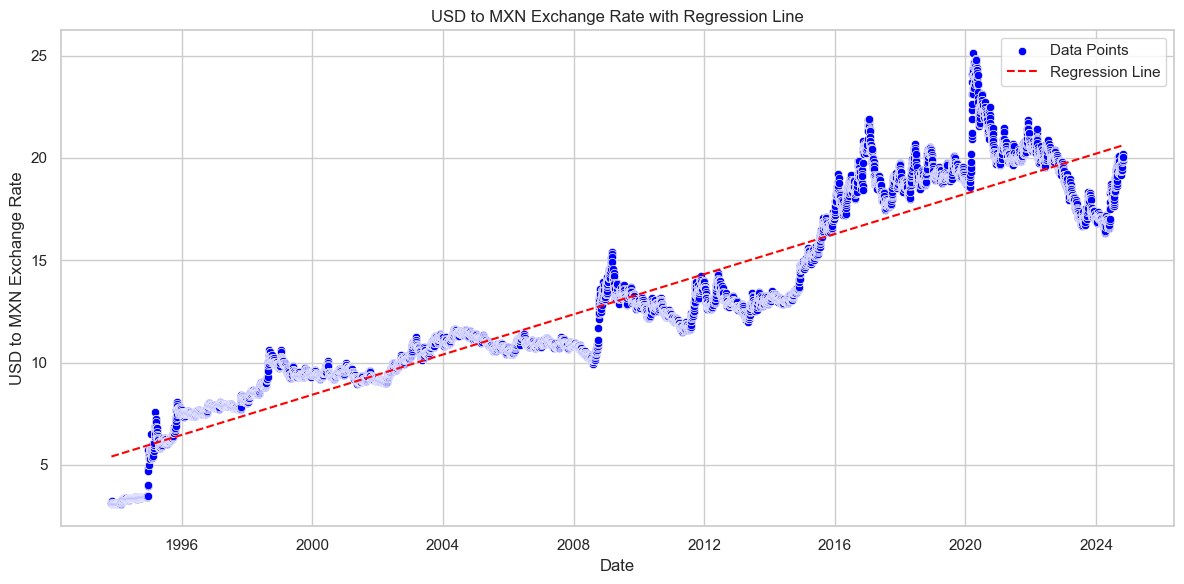

In [98]:
# Set Seaborn style for readability
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of data points
sns.scatterplot(x=data_fx.index, y=data_fx['Exchange Rate'], color="blue", label="Data Points")

# Plot regression line calculated previously
sns.lineplot(x=data_fx.index, y=regression_line, color="red", label="Regression Line", linestyle="--")

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("USD to MXN Exchange Rate")
plt.title("USD to MXN Exchange Rate with Regression Line")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [99]:
# This simple regression line is based on everything else the same.
# Convert the last day to ordinal


# Assuming the last date in data_fx is the last date you want to convert
last_day = data_fx.index[-1]  # Get the last date in the DataFrame

# Convert the date to ordinal (number of days since Jan 1, year 1)
last_day_ordinal = last_day.toordinal()

print("The last day in ordinal format:", last_day_ordinal)


The last day in ordinal format: 739191


In [102]:
# Calculate the date 90 days after the last date
future_day = last_day + timedelta(days=90)

# Convert this future date to ordinal format for use in regression
future_day_ordinal = future_day.toordinal()

print("The future day (90 days later) in ordinal format:", future_day_ordinal)
print("Date 90 days later:", future_day)

The future day (90 days later) in ordinal format: 739281
Date 90 days later: 2025-01-30 00:00:00


In [103]:
# Print the slope and intercept to verify their values
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.0013446182264162526
Intercept: 5.40815283629557


In [104]:
# Ensure x_90_days_later is correctly calculated as the ordinal date 90 days from the last date
x_90_days_later = future_day_ordinal  # Future date calculated as ordinal

# Calculate the predicted y value (USD to MXN exchange rate) for 90 days later
predicted_y = slope * x_90_days_later + intercept


In [105]:
# Ensure the predicted y value is not negative
predicted_y = max(predicted_y, 0)

print(f"Predicted USD to MXN exchange rate in 90 days: {predicted_y:.2f}")

Predicted USD to MXN exchange rate in 90 days: 999.46


### The USD is considered a safe haven during times of economic turmoil.


In [ ]:
# for loop for each row, set start_date 756 days or 3 years back.
# if data_3_year retrieves 3 years data
# need to adjust if any data is NaN
# Create the average and +/- 2 SD (standard deviation)

for row_date in data_fx.index:
    start_date = row_date - pd.DateOffset(days=756)  # Look back 756 days
    data_3_year = data_fx.loc[start_date:row_date, 'Exchange Rate']

    # why not return False or empty for the first three years
    if not data_3_year.empty:
        avg = data_3_year.mean()
        std = data_3_year.std()

        # Assign the computed values using loc
        data_fx.loc[row_date, '1_year_avg'] = avg
        data_fx.loc[row_date, '2_std_upper'] = avg + 2 * std
        data_fx.loc[row_date, '2_std_lower'] = avg - 2 * std


In [ ]:
# For 3 year trailing average, forward 3 years or 756 days
filtered_data = data_fx[data_fx.index >= data_fx.index[251]]

# Plotting: calculate current, 3 year moving average, and +/- 2 SD
filtered_data['Exchange Rate'].plot(label='Exchange Rate', color='blue', alpha=0.5)
filtered_data['1_year_avg'].plot(label='3 Year Avg', color='black', linestyle="--", alpha=0.5)
filtered_data['2_std_upper'].plot(label='2 Std Upper', color='red', linestyle='--')
filtered_data['2_std_lower'].plot(label='2 Std Lower', color='red', linestyle='--')

# Major economic events effecting USD to MXN exchanage rate
plt.axvspan(pd.Timestamp('1994-12-01'), pd.Timestamp('1995-01-31'), color='grey', alpha=0.5, label='Tequila Crisis')
plt.axvspan(pd.Timestamp('1997-07-01'), pd.Timestamp('1998-12-31'), color='lightblue', alpha=0.5, label='Asian Financial Crisis')
plt.axvspan(pd.Timestamp('2008-09-01'), pd.Timestamp('2009-06-30'), color='lightgreen', alpha=0.5, label='Global Financial Crisis')
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'), color='salmon', alpha=0.5, label='COVID-19 Pandemic')

 # Label and plot
plt.figure(figsize=(20, 10))
plt.title('USD to Mex Peso with Trailing 3 Yr Avg and +/- 2 SD')
plt.legend()
plt.tight_layout()
plt.show()

# If all the code in one panel or cell, it works.
# How to fix this problem


### Correlation

In [ ]:

data

In [ ]:
quarterly_avg = data.resample('Q').mean()
quarterly_avg

In [ ]:
quarterly_avg.dropna(inplace=True)
quarterly_avg

In [ ]:
correlation_matrix = quarterly_avg.corr()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(correlation_matrix)

### Interest Rate Parity (IRP). F = S x (1 + i US)/(1 + i MX).  
##### F is forward exchange rate, S is spot exchange rate (current), i US
##### is US 90 day T-bill and i MX is Mexico 90 day T-bill.
##### Example: F = 18 x (1.02) / (1.05) = 17.78
##### Everything else the same, the USD will depreciate vs MXN.

In [ ]:
# Calculate the forward exchange rate out 90 days and compare to actual
# exchange rate.

In [ ]:
# Run a correlation to see if IRP is a good predictor of future exchange rate.

### Prophet